# Seattle listings - Exploratory Data Analysis

## Goal
* Draw informative conclusions about the correlations between categorical and numeric features

## Data
* Preprocessed Seattle listings data
    
## Questions  
* How many listings are registered in the different neighbourhoods?
* How and by how much the prices and cleaning fees vary in the different neighbourhoods?
* How and by how much the prices and cleaning fees vary for the different property types?
* How and by how much the prices and cleaning fees vary for the different room types?

## Methods
* Built descriptive function
* Use numpy and pandas built-in functions
* Visualise the resuts in tables,plots, charts and folium maps.

# Import the relevant libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import folium
from folium.plugins import HeatMap
import numpy as np
%matplotlib inline

# Import dataframe

In [2]:
# import preprocessed data to dataframes
df = pd.read_pickle('Seattle_data/clean_lisitings.pkl')

# Statistical summary

In [3]:
# Statistical summary about the relevant numeric columns
# I use the built in "describe" function to get the statistical summary of the relevant numeric columns.
# I exclude the irrelevant columns ['id','scrape_id','host_id','latitude','longitude']

df.drop(['id','scrape_id','host_id','latitude','longitude'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,3816.0,95.584906,11.165601,17.00,100.00,100.000000,100.000000,100.00
host_acceptance_rate,3816.0,99.973795,1.618810,0.00,100.00,100.000000,100.000000,100.00
host_listings_count,3816.0,7.157757,28.628149,1.00,1.00,1.000000,3.000000,502.00
host_total_listings_count,3816.0,7.157757,28.628149,1.00,1.00,1.000000,3.000000,502.00
accommodates,3816.0,3.350105,1.977876,1.00,2.00,3.000000,4.000000,16.00
bathrooms,3800.0,1.259605,0.590494,0.00,1.00,1.000000,1.000000,8.00
bedrooms,3810.0,1.308136,0.883359,0.00,1.00,1.000000,2.000000,7.00
beds,3815.0,1.735780,1.139654,1.00,1.00,1.000000,2.000000,15.00
price,3816.0,127.723198,89.139353,20.00,75.00,100.000000,150.000000,999.00
security_deposit,3816.0,254.484832,103.203514,95.00,250.00,254.484832,254.484832,995.00


# Correlation among the numeric features

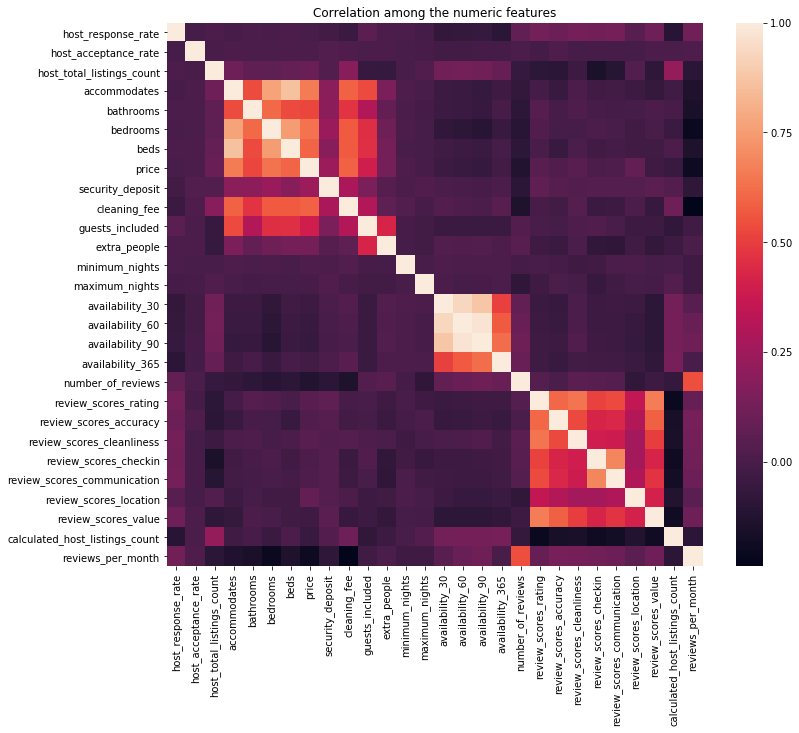

In [4]:
# Get the correlation of the different numeric columns
# The "corr()" built-in function and the seaborn heatmap are used for the task.

plt.figure(figsize=(12,10))
dff = df.drop(['id','scrape_id','host_id','latitude','longitude','host_listings_count'],axis=1)
ax = sns.heatmap(dff.corr());
plt.title('Correlation among the numeric features');

### Findings
* Based on the heatmap, there are 3 clusters of correlations in the Seattle listings data.
* We see a fairly strong correlation among the scores and reviews (lower_right corner of the heatmap)
* There is a strong correlation among the availability measures which is expected since they are cummulative(centre)
* There is a fairly strong correlation among the fees, prices and room specifics (upper left corner)

# Descriptive Statistics 

In [5]:
'''
    Input: 
    df - Preprocessed Seattle listings dataframe
    Col1 = categorical column in the df
    col2 = numeric column column in the df
    
    output: 
    sats_summary = A table showing the statistical summary of features of col1 in relation col2
    Sats_summary columns = Mean, median, standard deviation(std),maximum, minimum, 5th & 95th percentile,
                            count of col1 and percentage share of col1

    This function calculates, summarize and presents the descriptive statistics of a categorical column 
    1. Group the dataframe by the categorical variable in relation to a numeric varible.
    2. Perform operation on the groupby dataframe (mean, median,std,max,min, quantiles([.5,95]))
    3. Perform a count on the categorical column(col1) and calculate the percentage.
    4. Merge all the statistcial features into a new dataframe
'''

def stats_description(df, col1, col2):
    dict1 = df.groupby(col1)[col2].mean().to_dict()
    dict2 = df.groupby(col1)[col2].median().to_dict()
    dict3 = df.groupby(col1)[col2].std().to_dict()
    dict4 = df.groupby(col1)[col2].max().to_dict()
    dict5 = df.groupby(col1)[col2].min().to_dict()
    dict6 = df.groupby(col1)[col2].quantile(.5).to_dict()
    dict7 = df.groupby(col1)[col2].quantile(.95).to_dict()
    dict8 = df[col1].value_counts().to_dict()
    dicts = [dict1, dict2, dict3, dict4, dict5,dict6,dict7,dict8]
    result_dict = {}
    for d in dicts:
        for k, v in d.items():
            try:
                result_dict.setdefault(k, []).extend(v)
            except TypeError:
                result_dict[k].append(v)
    
    sats_summary = pd.DataFrame(result_dict, index = ['mean_' + col2, 'median_' + col2, 'std_' + col2, 'max_' + col2, 'min_' + col2, 
                                                      '5th perc_' + col2 ,'95th perc_' + col2 ,'Counts']).T
    sats_summary['Perc_Counts'] = sats_summary['Counts']/np.sum(sats_summary['Counts'])

    
    return sats_summary

## Neighbourhood & Prices
 * Run the function col1 = neighbourhood_group_cleansed and col2 = price
 * Visualise the results (count, bar and box plots)

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price,Counts,Perc_Counts
Ballard,124.682609,95.0,87.925033,475.0,25.0,95.0,350.00,230.0,0.060273
Beacon Hill,94.669492,75.0,61.528682,399.0,30.0,75.0,201.40,118.0,0.030922
Capitol Hill,130.592593,105.0,92.442331,750.0,22.0,105.0,295.00,567.0,0.148585
Cascade,140.101124,115.0,112.179042,775.0,42.0,115.0,280.00,89.0,0.023323
Central Area,128.338753,100.0,80.260558,500.0,35.0,100.0,295.00,369.0,0.096698
Delridge,83.278481,72.0,41.797110,300.0,35.0,72.0,148.20,79.0,0.020702
Downtown,154.329545,139.0,90.947831,999.0,35.0,139.0,300.00,528.0,0.138365
Interbay,109.727273,90.0,60.003485,250.0,50.0,90.0,200.00,11.0,0.002883
Lake City,92.671642,70.0,57.212625,252.0,35.0,70.0,247.00,67.0,0.017558
Magnolia,177.672131,129.0,150.078726,950.0,30.0,129.0,375.00,61.0,0.015985


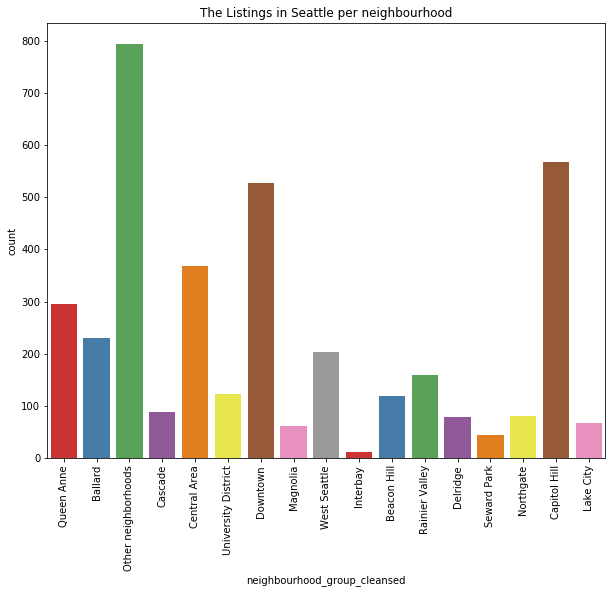

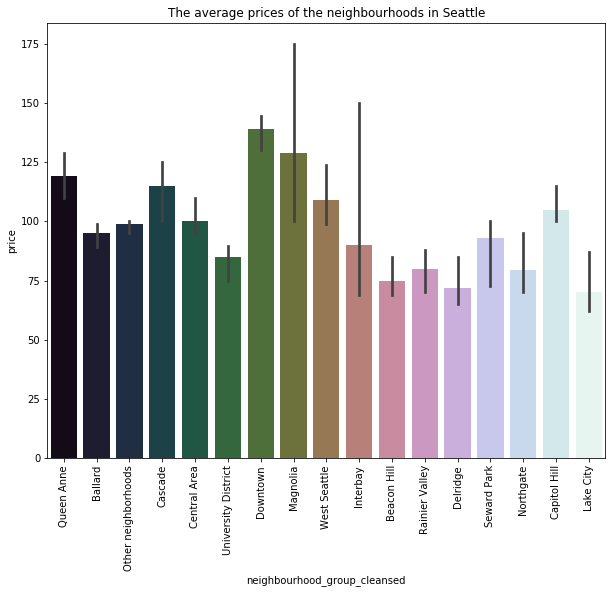

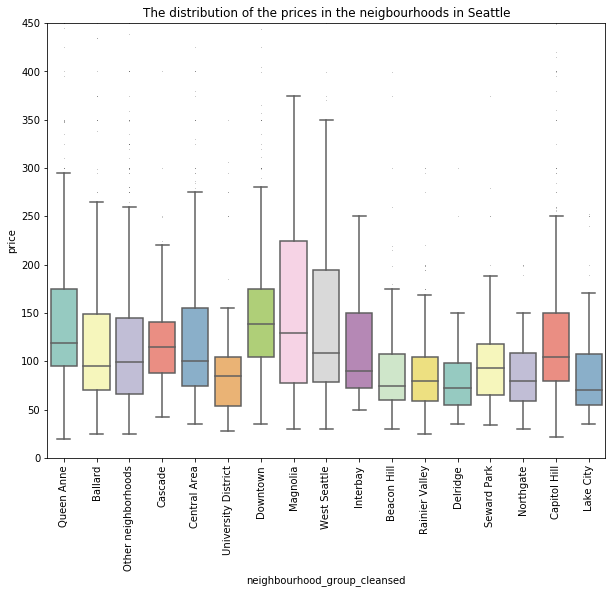

In [20]:
#Countplot
plt.figure(figsize=(10,8))
ax=sns.countplot(x= "neighbourhood_group_cleansed",data=df,palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('The Listings in Seattle per neighbourhood');
#Barplot    
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "neighbourhood_group_cleansed", y = 'price',estimator = np.median,palette='cubehelix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 450);
plt.title('The average prices of the neighbourhoods in Seattle');

#Boxplot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "neighbourhood_group_cleansed", y = 'price', fliersize = 0.1,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 450);
plt.title('The distribution of the prices in the neigbourhoods in Seattle');

#Run function for stats_summary
stats_description(df,"neighbourhood_group_cleansed",'price')

##### Findings: 
* Capitol Hill and Interbay have the highest(15%) and lowest(0.2%) listings in Seattle respectively
* On average the prices are highest in Magnolia (178) and lowest in Delridge(83)
* In general the prices in Seattle heighbourhoods are unevenly distributed.
* The prices in Seattle are most spread out in Magnolia as seen from the std = 150
* The prices in Seattle are least spread out in Northgate as seen from the std = 38

## Property type & prices
* Run the function ("stats_description") col1 = Property_type and col2 = price
* Visualise the results (count and box plots)

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price,Counts,Perc_Counts
Apartment,122.872216,110.0,66.583144,999.0,20.0,110.0,229.75,1706.0,0.447182
Bed & Breakfast,112.054054,99.0,55.840022,299.0,30.0,99.0,207.40,37.0,0.009699
Boat,282.375000,150.0,281.327434,775.0,75.0,150.0,741.75,8.0,0.002097
Bungalow,115.615385,95.0,75.226922,349.0,65.0,95.0,233.20,13.0,0.003408
Cabin,104.666667,95.0,55.218053,300.0,52.0,95.0,210.00,21.0,0.005505
Camper/RV,120.461538,82.0,95.375237,375.0,45.0,82.0,309.00,13.0,0.003408
Chalet,98.500000,98.5,51.618795,135.0,62.0,98.5,131.35,2.0,0.000524
Condominium,151.109890,115.0,111.091099,700.0,50.0,115.0,320.00,91.0,0.023853
Dorm,39.500000,39.5,2.121320,41.0,38.0,39.5,40.85,2.0,0.000524
House,131.848080,95.0,104.823698,975.0,25.0,95.0,350.00,1733.0,0.454260


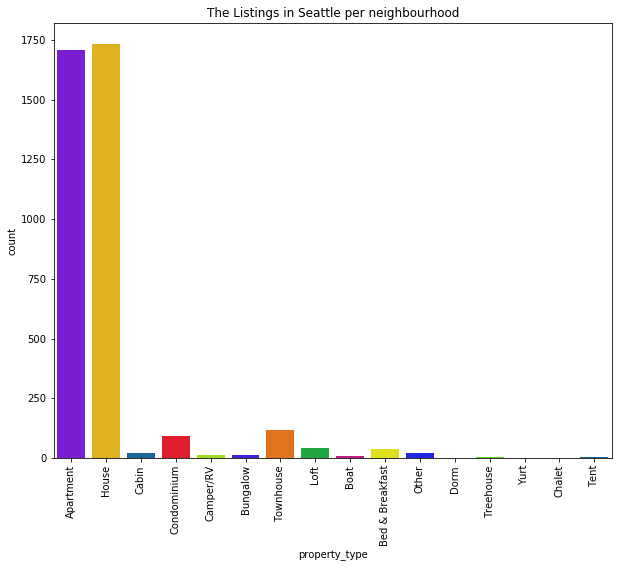

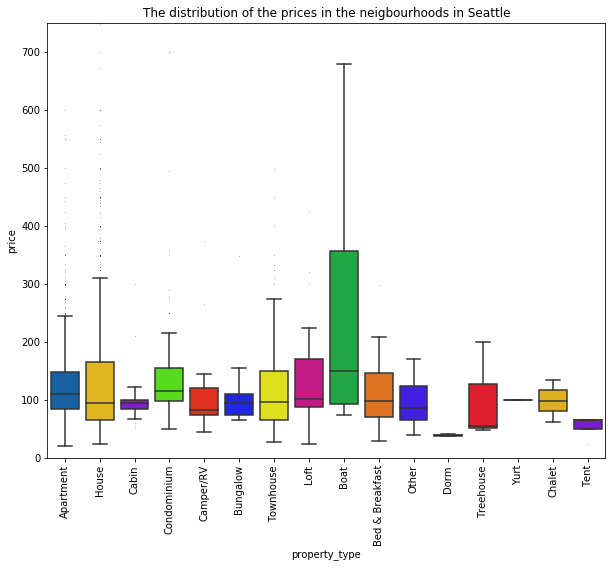

In [7]:
# Visualise the results (count and box plots)
plt.figure(figsize=(10,8))
ax=sns.countplot(x= "property_type",data=df,palette='prism_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('The Listings in Seattle per neighbourhood');
    
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "property_type", y = 'price', fliersize = 0.1,palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 750);
plt.title('The distribution of the prices in the neigbourhoods in Seattle');

stats_description(df,"property_type",'price')

#### Findings
* Aproximately 90% of the properties listed in Seattle are apartments and houses
* Yurts,dorms and charlet are the 3 least popular properties in Seattle.
* On avergae, a boat is the most highly priced property in Seattle with an average price 282.
  The prices for boats also have the highest spread (std = 281)
* The appartment prices range from 20 to 999, having the lowest(min) and highest(max)prices among the properties in Seattle.
* The dorm prices are the least spread (std=2) and this is because they also have the lowest counts in the data.

## Property type & Cleaning fee
* Run the function ("stats_description") col1 = Property_type and col2 = cleaning fee
* Visualise the results (box plots)

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee,Counts,Perc_Counts
Apartment,59.156470,61.724076,33.127956,274.000000,5.000000,61.724076,112.500000,1706.0,0.447182
Bed & Breakfast,47.553555,61.724076,18.183196,61.724076,10.000000,61.724076,61.724076,37.0,0.009699
Boat,86.896529,61.724076,82.177101,275.000000,15.000000,61.724076,213.750000,8.0,0.002097
Bungalow,55.167094,50.000000,47.486206,200.000000,12.000000,50.000000,117.034446,13.0,0.003408
Cabin,43.596033,50.000000,21.361015,61.724076,5.000000,50.000000,61.724076,21.0,0.005505
Camper/RV,39.893875,30.000000,19.705183,61.724076,15.000000,30.000000,61.724076,13.0,0.003408
Chalet,30.000000,30.000000,7.071068,35.000000,25.000000,30.000000,34.500000,2.0,0.000524
Condominium,65.579752,61.724076,40.324836,250.000000,5.000000,61.724076,135.000000,91.0,0.023853
Dorm,33.862038,33.862038,39.402872,61.724076,6.000000,33.862038,58.937872,2.0,0.000524
House,65.184574,61.724076,49.360824,300.000000,5.000000,61.724076,160.000000,1733.0,0.454260


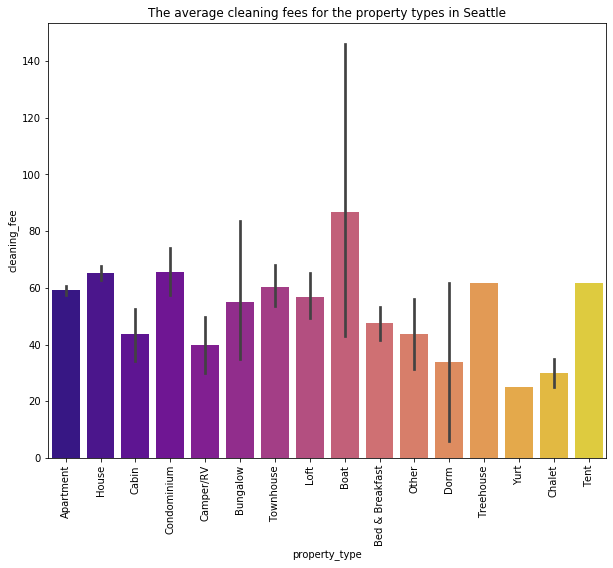

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "property_type", y = 'cleaning_fee',estimator = np.mean, palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 450);
plt.title('The average cleaning fees for the property types in Seattle');
    
stats_description(df,"property_type",'cleaning_fee')

#### Findings:
* On average a boat is the most expensive property to clean in Seattle with average cleaning price = 87.
* On average a yurt is the least expendive property to clean in Seattle with average cleaning price = 25.
  This is expected based on the kind of property it is.
* The highest cleaning fee paid is 300 for the property type house.
  I can't explain why this house's cleaning cost was this high but maybe the answer can be found in the data.

## Room type & Prices
* Run the function ("stats_description") col1 = Room_type and col2 = price
* Visualise the results (pie-chart)

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price,Counts,Perc_Counts
Entire home/apt,155.485121,126.0,95.100584,999.0,39.0,126.0,349.1,2539.0,0.665356
Private room,75.044828,69.0,34.603905,399.0,20.0,69.0,139.0,1160.0,0.303983
Shared room,47.547009,40.0,19.372704,118.0,22.0,40.0,95.0,117.0,0.030660


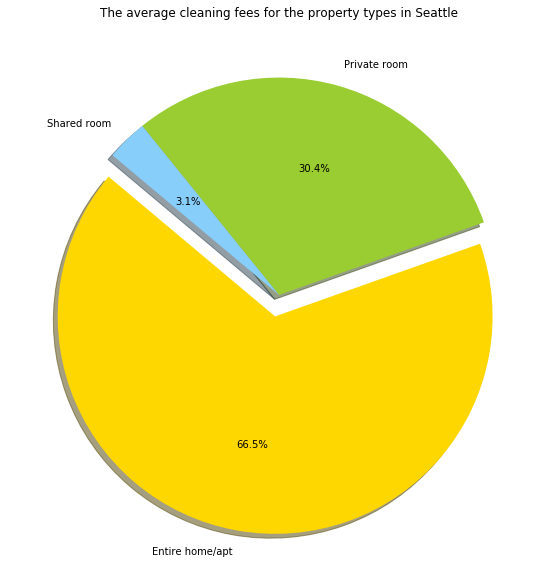

In [9]:
df['room_type'].value_counts()
room_dict = df['room_type'].value_counts().to_dict()
room_list=[]
for key, value in room_dict.items():
    temp = [key,value]
    room_list.append(temp)

# make dataframe from neighborhood_list
dff = pd.DataFrame(room_list, columns=['Room','Count'])
dff['Perc'] = dff['Count']/np.sum(dff['Count'])

labels = 'Entire home/apt', 'Private room', 'Shared room'
sizes = [dff['Perc'][0], dff['Perc'][1], dff['Perc'][2]]
colors = ['gold', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Pie-chart
plt.figure(figsize=(12,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The average cleaning fees for the property types in Seattle');

stats_description(df,"room_type",'price')

### Findings
* Entire home/apartment take the highest share of room types 66.5% in Seattle
* Shared room have the lowest share 3.1% in Seattle
* Entire home/apartment charged the highest price on average.

## Room type & Cleaning fee
* Run the function ("stats_description") col1 = Room_type and col2 = cleaning fee
* Visualise the results (box plots)

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee,Counts,Perc_Counts
Entire home/apt,71.734013,61.724076,45.549743,300.0,5.0,61.724076,159.000000,2539.0,0.665356
Private room,41.598398,50.000000,22.191055,150.0,5.0,50.000000,61.724076,1160.0,0.303983
Shared room,44.036516,60.000000,20.041334,75.0,5.0,60.000000,61.724076,117.0,0.030660


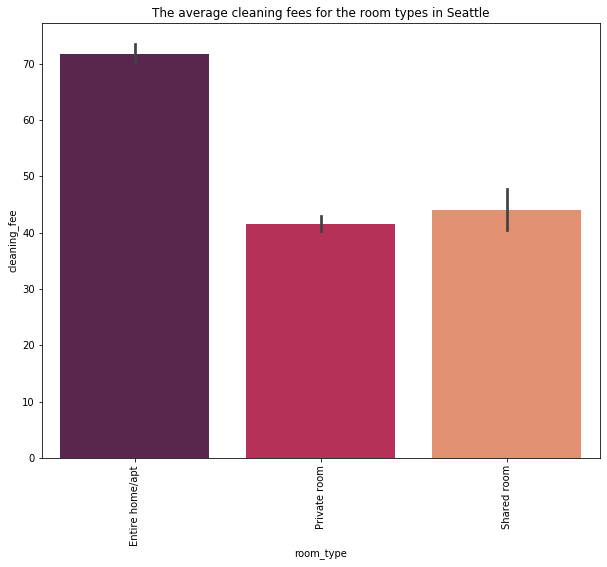

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "room_type", y = 'cleaning_fee',estimator = np.mean, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 450);
plt.title('The average cleaning fees for the room types in Seattle');

stats_description(df,"room_type",'cleaning_fee')

### Findings
* Entire home/apartment are charged the highest cleaning fee (71.73)
* Cleaning fees for Entire home/apartment have the highest spread (45.5)

## Cancellation policy & security deposit
* Run the function ("stats_description") col1 = cancellation_policy and col2 = security_deposit
* Visualise the results (pie_chart, barplots)

,mean_security_deposit,median_security_deposit,std_security_deposit,max_security_deposit,min_security_deposit,5th perc_security_deposit,95th perc_security_deposit,Counts,Perc_Counts
flexible,250.980286,254.484832,73.024425,995.0,95.0,254.484832,300.0,1149.0,0.301101
moderate,235.020428,254.484832,96.388133,800.0,95.0,254.484832,427.5,1250.0,0.327568
strict,274.496989,254.484832,124.227605,995.0,95.0,254.484832,500.0,1417.0,0.371331


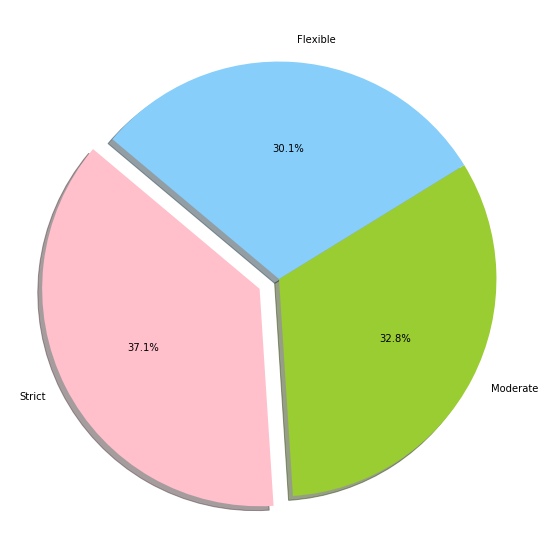

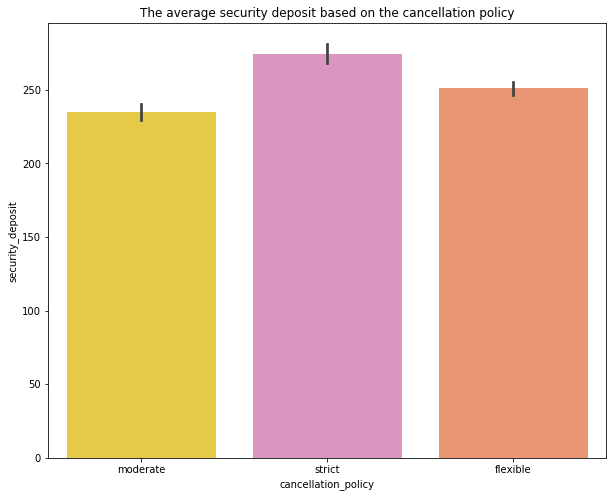

In [11]:
df['cancellation_policy'].value_counts()
room_dict = df['cancellation_policy'].value_counts().to_dict()
room_list=[]
for key, value in room_dict.items():
    temp = [key,value]
    room_list.append(temp)

# make dataframe from neighborhood_list
dff = pd.DataFrame(room_list, columns=['Policy','Count'])
dff['Perc'] = dff['Count']/np.sum(dff['Count'])

labels = 'Strict', 'Moderate', 'Flexible'
sizes = [dff['Perc'][0], dff['Perc'][1], dff['Perc'][2]]
colors = ['pink', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.figure(figsize=(10, 8))
sns.barplot(x='cancellation_policy',y='security_deposit',data=df,palette = "Set2_r");
plt.title('The average security deposit based on the cancellation policy');
    
stats_description(df,"cancellation_policy",'security_deposit')

# Amenities 
* The top amnenities in included in the Seattle property.

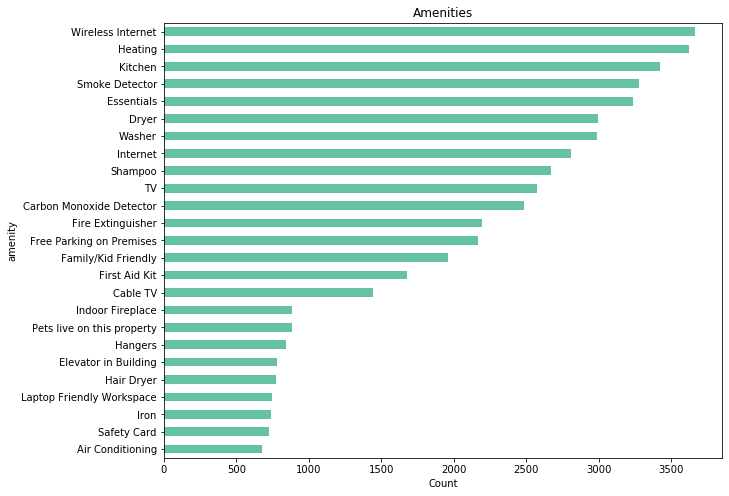

In [12]:
# Strip the rows in the amenities columns into lists.
# Pass the lists into the Counter function
# Create a new dataframe with the amenities and counts
# Plot the data in the new dataframe into a bar plot

from collections import Counter
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

sub_df = pd.DataFrame(results.most_common(25), columns=['amenity', 'count'])
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,8), legend=False,
                                                      title='Amenities',cmap='Set2')
plt.xlabel('Count');

# Host Verfication methods
* The top host verification methods in Seattle.

<Figure size 1080x720 with 0 Axes>

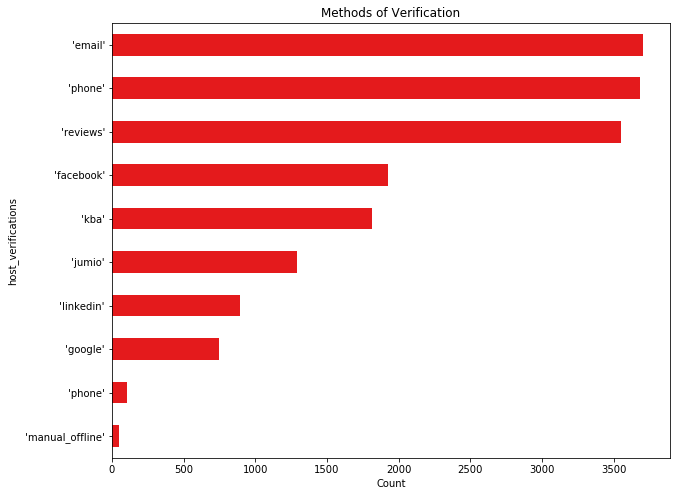

In [13]:
# Strip the rows in the host_verifications columns into lists.
# Pass the lists into the Counter function
# Create a new dataframe with the verifications and counts
# Plot the data in the new dataframe into a bar plot

from collections import Counter
results = Counter()
df['host_verifications'].str.strip('[]')\
               .str.split(',')\
               .apply(results.update)

plt.figure(figsize=(15,10))
ax = pd.DataFrame(results.most_common(10), columns=['host_verifications', 'count'])
ax.sort_values(by=['count'], ascending=True).plot(kind='barh', x='host_verifications', y='count',  
                                                      figsize=(10,8), legend=False,
                                                      title='Methods of Verification',cmap='Set1')
plt.xlabel('Count');

# Locating the Listings in Seattle
* Using the folium map and latitude-longtitude codes to locate the listings in Seattle.
* The heatmap shows listings in the different neighbourhoods.
* Pop-ups show the listings with the cleanliness scores less or equal to 6.

In [14]:
# Get the coordinates in the listings dataframe.
coordinates = df[['latitude','longitude']].values

# Select the room_type with cleanliness score less than 6.
res = df[df.review_scores_cleanliness <=6 ]
m = folium.Map([47.620422, -122.349358], zoom_start=12)
m.add_child(HeatMap(coordinates, radius=12))
for i,row in res.iterrows():
    # In the pop-up : line1 = room_type, line2=Cleanlines_score, line3=neighbourhood.
    popup_text = f"""
        <b>{row['room_type']}</b></br>
        <hr style='width:200px; margin-top:0px; margin-bottom:10px;'>
        <b>{row['review_scores_cleanliness']}</b></br>
        <hr style='width:200px; margin-top:0px; margin-bottom:10px;'>
        {str(row['neighbourhood_group_cleansed'].encode('raw_unicode_escape'))[2:-1]}
    """
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(m)
    if row['room_type'] == 'Entire home/apt':
        marker= folium.Marker([row['latitude'], row['longitude']], popup=popup_text,icon=folium.Icon(color ='green',icon_color='green'))
        marker.add_to(m)       
        
    elif row['room_type'] == 'Private room':
        marker= folium.Marker([row['latitude'], row['longitude']], popup=popup_text,icon=folium.Icon(color ='red',icon_color='red'))
        marker.add_to(m)
    else:
        marker= folium.Marker([row['latitude'], row['longitude']], popup=popup_text,icon=folium.Icon(color ='purple',icon_color='purple'))
        marker.add_to(m)
    
m

In [15]:
m.save('Seattle_data/Seattle_listings_heatmap.html')